<a href="https://colab.research.google.com/github/DevilNReality/Fashion-MNIST-Prediction/blob/main/Code%20File/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Approach to the Problem

1. Load the dataset and Libraries
2. Declare the model
  * Sequential: Sequence of layers
  * Functional: Multi Modal/ Transfer Learning
3. Declare the Layers
  * Dense , Dropout
  * Number of Neurons , Act Function
4. Compile the model
  * Optimizer (SGD , Adam)
  * Loss Function (Cross Entropy , MSE , RMSE)
  * Metrics (Accuracy , F1 , Precision , Recall)
5. Fit the model
  * Pass X Train and Y Train
  * Pass X Test and Y Test
  * Epochs
  * Batch Size
6. Predict and Evaluate the model


# Load the dataset and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense , Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD , Adam

In [2]:
!unzip '/content/Fashion MNIST.zip'

Archive:  /content/Fashion MNIST.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [3]:
train = pd.read_csv('/content/fashion-mnist_train.csv')
test = pd.read_csv('/content/fashion-mnist_test.csv')

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(train['label'].min())
print(train['label'].max())

0
9


# Splitting of Data

In [6]:
x = train.drop('label' , axis = 1)
y = train['label']

In [7]:
print(x.shape)
print(y.shape)

(60000, 784)
(60000,)


In [8]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 10)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


# Model Evaluation Function

In [10]:
def model_eval(actual , predicted):
  conf_matrix = confusion_matrix(actual , predicted)
  clas_rep = classification_report(actual , predicted)
  acc_score = accuracy_score(actual , predicted)

  print("The Accuracy of the Model is:" , round(acc_score , 2))
  print(conf_matrix)
  print(clas_rep)

# One Hot Encode the Output

In [11]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

# Declare Model and Layers

In [12]:
model = Sequential()
model.add(Dense(128 , activation = 'relu' , input_shape = (784,))) # Layer 1 and Input Layer
model.add(Dropout(0.2)) #Dropout Layer
model.add(Dense(128 , activation = 'relu')) # Layer 2
model.add(Dropout(0.2)) #Dropout Layer
model.add(Dense(128 , activation = 'relu')) # Layer 3
model.add(Dropout(0.2)) #Dropout Layer
model.add(Dense(128 , activation = 'relu')) # Layer 4
model.add(Dropout(0.2)) #Dropout Layer
model.add(Dense(10 , activation = 'softmax')) # Output Layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,306 (591.04 KB)

 Trainable params: 151,306 (591.04 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the Model

In [14]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

# Fit the Model

In [15]:
hist = model.fit(x_train , y_train_ohe , batch_size = 128 , epochs = 100 , validation_data = (x_test , y_test_ohe))

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3296 - loss: 8.2987 - val_accuracy: 0.5497 - val_loss: 1.1761
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5363 - loss: 1.2496 - val_accuracy: 0.6916 - val_loss: 0.8084
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6435 - loss: 0.9590 - val_accuracy: 0.7203 - val_loss: 0.7026
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6656 - loss: 0.8612 - val_accuracy: 0.7309 - val_loss: 0.6620
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6808 - loss: 0.7997 - val_accuracy: 0.7307 - val_loss: 0.6310
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7040 - loss: 0.7277 - val_accuracy: 0.7460 - val_loss: 0.6130
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7185 - loss: 0.6842 - val_accuracy: 0.7453 - val_loss: 0.6173
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7195 - loss: 0.6845 - val_ac

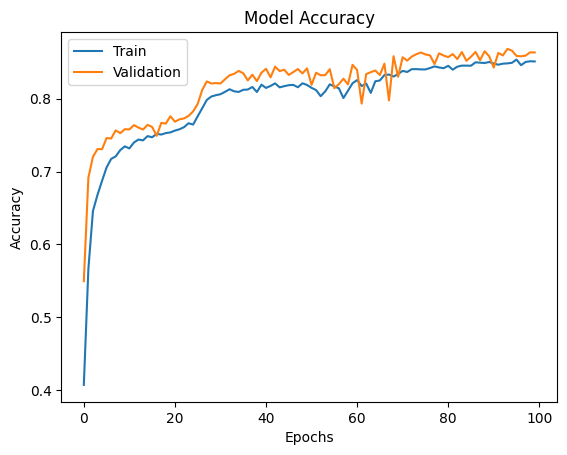

In [16]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train' , 'Validation'] , loc = 'upper left')
plt.show()

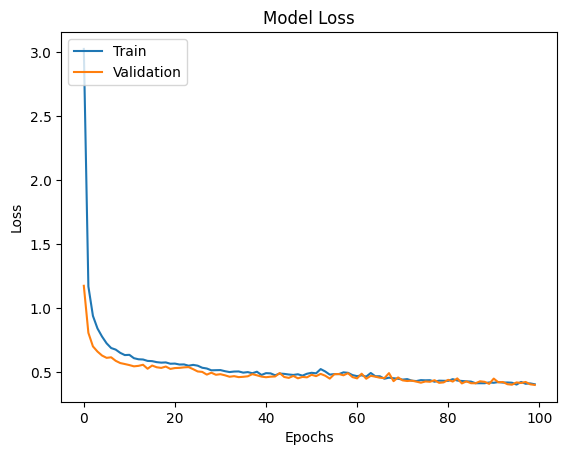

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train' , 'Validation'] , loc = 'upper left')
plt.show()

# Model Evaluation

In [18]:
y_hat_train_dense = np.argmax(model.predict(x_train) , axis = 1)
y_hat_test_dense = np.argmax(model.predict(x_test) , axis = 1)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
model_eval(y_train , y_hat_train_dense)

The Accuracy of the Model is: 0.89
[[3904   14   42  145   20    0  661    0   30    0]
 [   5 4735    3   63    5    0    3    1    1    0]
 [  17    0 3703   44  763    0  256    0    7    0]
 [  69   21   32 4389  170    0   70    3    1    0]
 [   5    4  338  224 4110    0  109    0    3    0]
 [   0    0    0    0    0 4792    0   19    0    2]
 [ 485    1  610  127  787    0 2785    1   44    0]
 [   0    0    0    0    0    2    0 4751    0   41]
 [   0    0    8   11   16    0   28    8 4712    0]
 [   0    0    0    0    0    3    0  187    0 4610]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4816
           1       0.99      0.98      0.99      4816
           2       0.78      0.77      0.78      4790
           3       0.88      0.92      0.90      4755
           4       0.70      0.86      0.77      4793
           5       1.00      1.00      1.00      4813
           6       0.71      0.58      0.64      4840
 

In [20]:
model_eval(y_test , y_hat_test_dense)

The Accuracy of the Model is: 0.86
[[ 912    5   17   40    6    0  191    0   13    0]
 [   2 1156    3   18    1    0    2    1    1    0]
 [   7    0  920   14  200    0   66    0    3    0]
 [  22   15   11 1135   39    0   19    1    3    0]
 [   0    4   76   62 1020    0   43    0    2    0]
 [   0    0    0    0    0 1142    2   25    1   17]
 [ 164    3  132   29  199    0  618    0   15    0]
 [   0    0    0    0    1    8    0 1163    1   33]
 [   0    0    9    7    4    1   16    8 1171    1]
 [   0    0    0    0    0    6    0   70    0 1124]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1184
           1       0.98      0.98      0.98      1184
           2       0.79      0.76      0.77      1210
           3       0.87      0.91      0.89      1245
           4       0.69      0.85      0.76      1207
           5       0.99      0.96      0.97      1187
           6       0.65      0.53      0.58      1160
 